# Data cleaning 

Purpose of this jupyter notebook is to import the data to be analysed, have them cleaned, and keep only relevant   info for the following analysis.

In [1]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import warnings

warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", None)

In [2]:
# Data paths
SALARY_DATA = "/Users/synikola/Desktop/Github/EDAChallenge2022/DATA/DataScientist.csv"
COST_OF_LIVING = "/Users/synikola/Desktop/Github/EDAChallenge2022/DATA/costofliving.csv"
TAXES = "/Users/synikola/Desktop/Github/EDAChallenge2022/DATA/TAXES.xlsx"

In [3]:
# Reading data into pandas dataframes

salary = pd.read_csv(SALARY_DATA)
cost = pd.read_csv(COST_OF_LIVING)
taxes = pd.read_excel(TAXES)

EDA and cleaning on the salary dataframe

In [4]:
salary.head(3)

,Unnamed: 0,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,0,0,Senior Data Scientist,$111K-$181K (Glassdoor est.),"ABOUT HOPPER\n\nAt Hopper, we’re on a mission ...",3.5,Hopper\n3.5,"New York, NY","Montreal, Canada",501 to 1000 employees,2007,Company - Private,Travel Agencies,Travel & Tourism,Unknown / Non-Applicable,-1,-1
1,1,1,"Data Scientist, Product Analytics",$111K-$181K (Glassdoor est.),"At Noom, we use scientifically proven methods ...",4.5,Noom US\n4.5,"New York, NY","New York, NY",1001 to 5000 employees,2008,Company - Private,"Health, Beauty, & Fitness",Consumer Services,Unknown / Non-Applicable,-1,-1
2,2,2,Data Science Manager,$111K-$181K (Glassdoor est.),Decode_M\n\nhttps://www.decode-m.com/\n\nData ...,-1.0,Decode_M,"New York, NY","New York, NY",1 to 50 employees,-1,Unknown,-1,-1,Unknown / Non-Applicable,-1,True


In [5]:
salary.describe()

,Unnamed: 0,index,Rating,Founded
count,3909.000000,3909.000000,3909.000000,3909.000000
mean,1954.000000,2167.446662,3.283576,1479.154771
std,1128.575429,1247.657849,1.575749,855.750138
min,0.000000,0.000000,-1.000000,-1.000000
25%,977.000000,1121.000000,3.200000,1625.000000
50%,1954.000000,2161.000000,3.700000,1976.000000
75%,2931.000000,3249.000000,4.100000,2002.000000
max,3908.000000,4379.000000,5.000000,2020.000000


In [6]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3909 entries, 0 to 3908
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         3909 non-null   int64  
 1   index              3909 non-null   int64  
 2   Job Title          3909 non-null   object 
 3   Salary Estimate    3909 non-null   object 
 4   Job Description    3909 non-null   object 
 5   Rating             3909 non-null   float64
 6   Company Name       3909 non-null   object 
 7   Location           3909 non-null   object 
 8   Headquarters       3909 non-null   object 
 9   Size               3909 non-null   object 
 10  Founded            3909 non-null   int64  
 11  Type of ownership  3909 non-null   object 
 12  Industry           3909 non-null   object 
 13  Sector             3909 non-null   object 
 14  Revenue            3909 non-null   object 
 15  Competitors        3909 non-null   object 
 16  Easy Apply         3909 

In [7]:
# Keep only relevant to our analysis columns: Job title, Salary Estimate, Location

In [8]:
# Dropping irrelevant columns
salary = salary[["Job Title", "Salary Estimate", "Location"]]

In [9]:
# Finding per hour entries in salary estimates 
salary.loc[salary["Salary Estimate"].str.contains("Per Hour"), "Salary Estimate"] = None

In [10]:
# Dropping na values
salary.dropna(inplace = True)

In [11]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3888 entries, 0 to 3908
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Job Title        3888 non-null   object
 1   Salary Estimate  3888 non-null   object
 2   Location         3888 non-null   object
dtypes: object(3)
memory usage: 121.5+ KB


Keeping only the starting salary from the salary estimate column.

In [12]:
salary["Minimum Salary"] =  salary['Salary Estimate'].replace(r'(Glassdoor est.)', '' , regex = True)

In [13]:
salary["Minimum Salary"] =  salary["Minimum Salary"].replace(r'K', '' , regex = True)

In [14]:
salary["Minimum Salary"] =  salary["Minimum Salary"].replace('\)', '' , regex = True)

In [15]:
salary["Minimum Salary"] =  salary["Minimum Salary"].replace('\(', '' , regex = True)

In [16]:
salary["Minimum Salary"] =  salary["Minimum Salary"].str.split('-').str[0]

In [17]:
salary["Minimum Salary"] = salary["Minimum Salary"].replace('\W', ' ', regex = True)

In [18]:
salary.rename(columns = {"Minimum Salary":"Minimum Salary (K $)"}, inplace = True)

In [19]:
salary

,Job Title,Salary Estimate,Location,Minimum Salary (K $)
0,Senior Data Scientist,$111K-$181K (Glassdoor est.),"New York, NY",111
1,"Data Scientist, Product Analytics",$111K-$181K (Glassdoor est.),"New York, NY",111
2,Data Science Manager,$111K-$181K (Glassdoor est.),"New York, NY",111
3,Data Analyst,$111K-$181K (Glassdoor est.),"Lyndhurst, NJ",111
4,"Director, Data Science",$111K-$181K (Glassdoor est.),"New York, NY",111
...,...,...,...,...
3904,AWS Data Engineer,$55K-$112K (Glassdoor est.),"Dublin, OH",55
3905,Data Analyst â Junior,$55K-$112K (Glassdoor est.),"Columbus, OH",55
3906,Security Analytics Data Engineer,$55K-$112K (Glassdoor est.),"Dublin, OH",55
3907,Security Analytics Data Engineer,$55K-$112K (Glassdoor est.),"Dublin, OH",55


Working on the cost of living dataset

In [20]:
# Keep only United States
cost = cost[cost["City"].str.contains("United States", regex= True)]

In [21]:
# Format the location column to be the same as in the salary dataset
cost.head()

,Rank,City,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
10,NaN,"Honolulu, HI, United States",103.65,65.07,85.56,114.92,94.28,89.24
13,NaN,"New York, NY, United States",100.00,100.00,100.00,100.00,100.00,100.00
18,NaN,"Santa Barbara, CA, United States",95.01,78.42,87.23,99.53,99.41,93.86
20,NaN,"Berkeley, CA, United States",94.36,88.22,91.48,106.23,78.85,85.78
21,NaN,"San Francisco, CA, United States",93.91,108.42,100.72,97.05,93.40,133.16


In [22]:
cost = cost.drop('Rank', axis = 1)

In [23]:
cost.reset_index(inplace = True, drop = True)

In [24]:
cost.head()

,City,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
0,"Honolulu, HI, United States",103.65,65.07,85.56,114.92,94.28,89.24
1,"New York, NY, United States",100.00,100.00,100.00,100.00,100.00,100.00
2,"Santa Barbara, CA, United States",95.01,78.42,87.23,99.53,99.41,93.86
3,"Berkeley, CA, United States",94.36,88.22,91.48,106.23,78.85,85.78
4,"San Francisco, CA, United States",93.91,108.42,100.72,97.05,93.40,133.16


In [25]:
cost.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95 entries, 0 to 94
Data columns (total 7 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   City                            95 non-null     object 
 1   Cost of Living Index            95 non-null     float64
 2   Rent Index                      95 non-null     float64
 3   Cost of Living Plus Rent Index  95 non-null     float64
 4   Groceries Index                 95 non-null     float64
 5   Restaurant Price Index          95 non-null     float64
 6   Local Purchasing Power Index    95 non-null     float64
dtypes: float64(6), object(1)
memory usage: 5.3+ KB


In [26]:
cost["Location"] = cost["City"].replace(', United States', '', regex = True)

In [27]:
cost.head()

,City,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index,Location
0,"Honolulu, HI, United States",103.65,65.07,85.56,114.92,94.28,89.24,"Honolulu, HI"
1,"New York, NY, United States",100.00,100.00,100.00,100.00,100.00,100.00,"New York, NY"
2,"Santa Barbara, CA, United States",95.01,78.42,87.23,99.53,99.41,93.86,"Santa Barbara, CA"
3,"Berkeley, CA, United States",94.36,88.22,91.48,106.23,78.85,85.78,"Berkeley, CA"
4,"San Francisco, CA, United States",93.91,108.42,100.72,97.05,93.40,133.16,"San Francisco, CA"


In [28]:
salary_cost = pd.merge(cost, salary, how = 'inner', on = "Location")

In [29]:
# Finding all data scientists
salary_cost.loc[salary_cost["Job Title"].str.contains(r"(Data Scientist)|(Data Science)", regex = True), "Job Title"] = "Data Scientist"

In [30]:
# Finding all data analytics related jobs
salary_cost.loc[salary_cost["Job Title"].str.contains(r"(Data Analyst)|(Data Analytics)", regex = True), "Job Title"] = "Data Analyst"

In [31]:
# Finding all data engineering related jobs
salary_cost.loc[salary_cost["Job Title"].str.contains(r"(Data Engineer)|(Data Engineering)", regex = True), "Job Title"] = "Data Engineer"

In [32]:
# Finding all none data related jobs (do not contain DATA in the job title)
salary_cost.loc[~salary_cost["Job Title"].str.contains(r"Data",
                                                      regex = True), "Job Title"] = None

In [33]:
salary_cost.dropna(inplace = True)

In [34]:
salary_cost

,City,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index,Location,Job Title,Salary Estimate,Minimum Salary (K $)
0,"New York, NY, United States",100.00,100.00,100.00,100.00,100.00,100.00,"New York, NY",Data Scientist,$111K-$181K (Glassdoor est.),111
1,"New York, NY, United States",100.00,100.00,100.00,100.00,100.00,100.00,"New York, NY",Data Scientist,$111K-$181K (Glassdoor est.),111
2,"New York, NY, United States",100.00,100.00,100.00,100.00,100.00,100.00,"New York, NY",Data Scientist,$111K-$181K (Glassdoor est.),111
3,"New York, NY, United States",100.00,100.00,100.00,100.00,100.00,100.00,"New York, NY",Data Scientist,$111K-$181K (Glassdoor est.),111
4,"New York, NY, United States",100.00,100.00,100.00,100.00,100.00,100.00,"New York, NY",Data Scientist,$111K-$181K (Glassdoor est.),111
...,...,...,...,...,...,...,...,...,...,...,...
2929,"San Antonio, TX, United States",62.59,38.27,51.19,57.25,69.45,137.67,"San Antonio, TX",Data Analyst,$43K-$76K (Glassdoor est.),43
2930,"San Antonio, TX, United States",62.59,38.27,51.19,57.25,69.45,137.67,"San Antonio, TX",Data Modeler,$43K-$76K (Glassdoor est.),43
2931,"San Antonio, TX, United States",62.59,38.27,51.19,57.25,69.45,137.67,"San Antonio, TX",Network Data engineer,$43K-$76K (Glassdoor est.),43
2932,"San Antonio, TX, United States",62.59,38.27,51.19,57.25,69.45,137.67,"San Antonio, TX",Senior Data Modeler,$43K-$76K (Glassdoor est.),43


Working with the taxes dataframe

In [35]:
taxes

,State,State HEADLINES,TOTAL,Effective Tax Rate
0,Alabama,AL,"Alabama, AL",9.8%
1,Alaska,AK,"Alaska, AK",4.6%
2,Arizona,AZ,"Arizona, AZ",9.5%
3,Arkansas,AR,"Arkansas, AR",10.2%
4,California,CA,"California, CA",13.5%
5,Colorado,CO,"Colorado, CO",9.7%
6,Connecticut,CT,"Connecticut, CT",15.4%
7,Delaware,DE,"Delaware, DE",12.4%
8,District of Columbia,DC,"District of Columbia, DC",12.0%
9,Florida,FL,"Florida, FL",9.1%


In [36]:
taxes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   State               51 non-null     object
 1   State HEADLINES     51 non-null     object
 2   TOTAL               51 non-null     object
 3   Effective Tax Rate  51 non-null     object
dtypes: object(4)
memory usage: 1.7+ KB


In [37]:
taxes.rename(columns = {"State HEADLINES":"State Headlines", "TOTAL":"Location"}, inplace = True)

In [38]:
salary_cost.shape

(2083, 11)

In [39]:
# Merging dataframes
salary_cost_taxes = pd.merge(salary_cost, taxes, how = "left", on = "Location")

In [40]:
salary_cost_taxes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2083 entries, 0 to 2082
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   City                            2083 non-null   object 
 1   Cost of Living Index            2083 non-null   float64
 2   Rent Index                      2083 non-null   float64
 3   Cost of Living Plus Rent Index  2083 non-null   float64
 4   Groceries Index                 2083 non-null   float64
 5   Restaurant Price Index          2083 non-null   float64
 6   Local Purchasing Power Index    2083 non-null   float64
 7   Location                        2083 non-null   object 
 8   Job Title                       2083 non-null   object 
 9   Salary Estimate                 2083 non-null   object 
 10  Minimum Salary (K $)            2083 non-null   object 
 11  State                           267 non-null    object 
 12  State Headlines                 26

In [41]:
# Changing Data type
salary_cost_taxes["Minimum Salary (K $)"] = pd.to_numeric(salary_cost_taxes["Minimum Salary (K $)"])

# Analysis

In [42]:
# Job Title, average minimum salary
# Location , average minimum salaries
# Location which type of data proffesion more popular
# Location - Cost of living index
# 10 Location with the highest average minimum - cost of living

x = salary_cost_taxes.groupby('Job Title').agg({
    'Minimum Salary (K $)':'mean'}).sort_values('Minimum Salary (K $)', ascending = False).reset_index()
x =  x[(x["Job Title"] == "Data Scientist") | (x["Job Title"] == "Data Analyst") |(x["Job Title"] == "Data Specialist") |(x["Job Title"] ==  "Data science researcher") |(x["Job Title"] ==  "Data Engineer")].reset_index(drop = True)

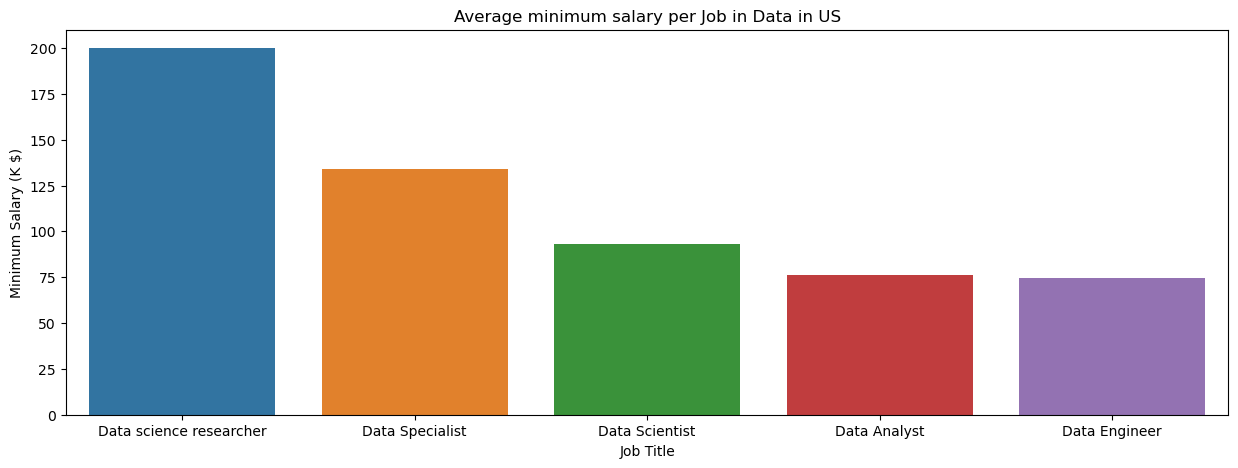

In [43]:
plt.figure(figsize = [15,5])
ax = sns.barplot(data = x , x = x["Job Title"], y = x["Minimum Salary (K $)"])
ax.set(title = "Average minimum salary per Job in Data in US")
plt.show()

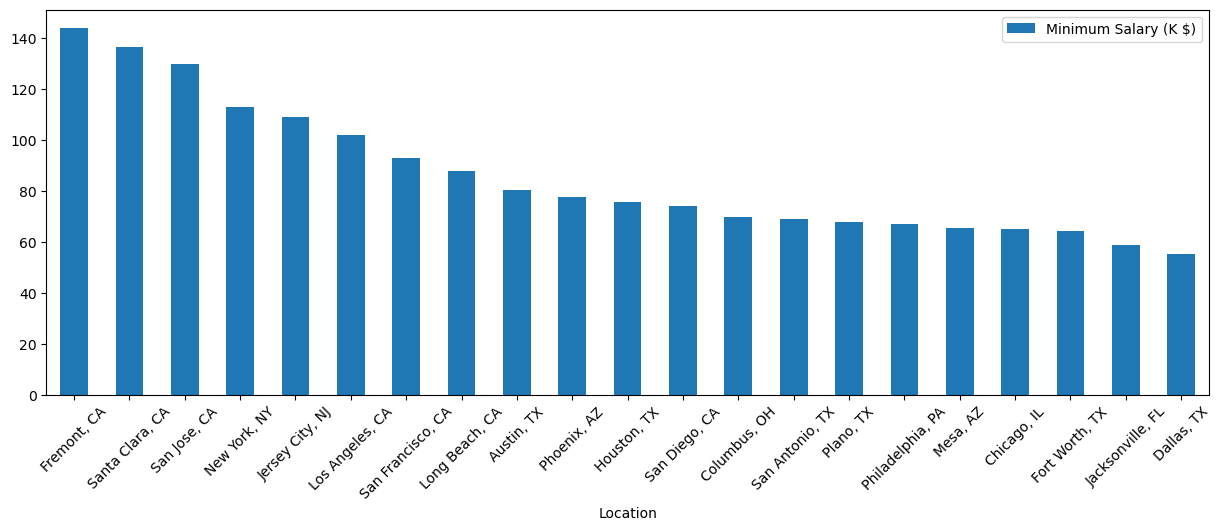

In [44]:
salary_cost_taxes.groupby('Location').agg({
    'Minimum Salary (K $)':'mean'}).sort_values('Minimum Salary (K $)', ascending = False).plot.bar(rot = 45, figsize = [15,5])
None

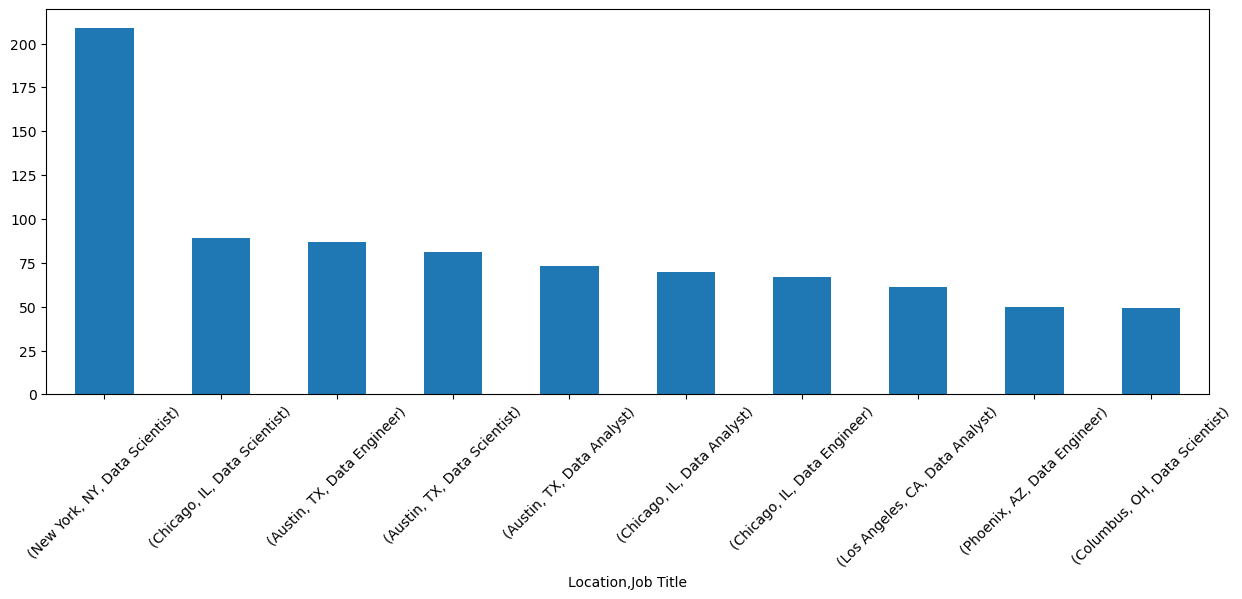

In [45]:
salary_cost_taxes.groupby(by = ['Location', 'Job Title'])["Job Title"].count().nlargest(10).plot.bar(rot = 45, figsize = [15,5])
None

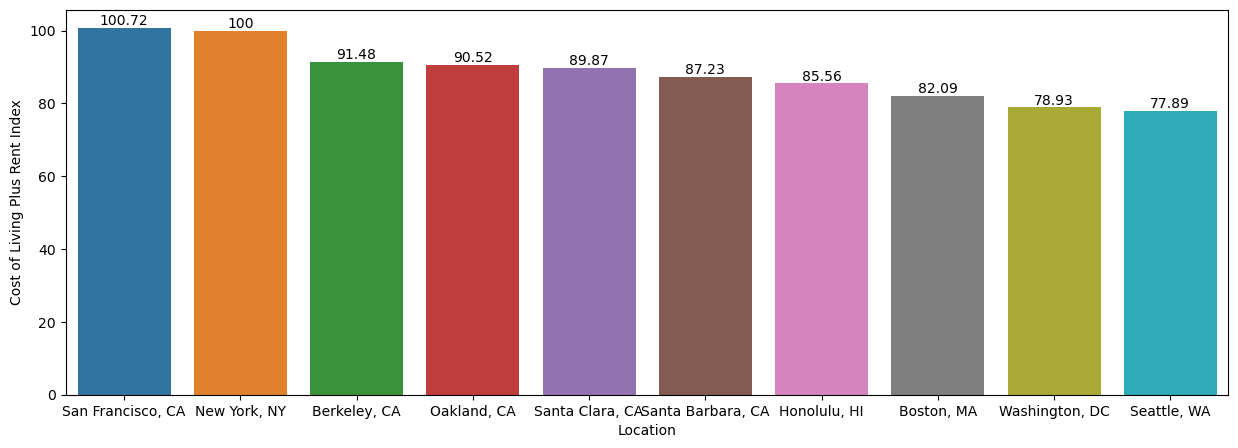

In [46]:
# Location - Cost of living index
salary_cost_taxes.head()


cost.head()
cost =  cost.sort_values("Cost of Living Plus Rent Index", ascending = False).head(10)
plt.figure(figsize = [15,5])
ax = sns.barplot(data = cost, x = cost["Location"] ,y = cost["Cost of Living Plus Rent Index"])
ax.bar_label(ax.containers[0])
ax.set()
plt.show()

In [47]:
y = salary_cost_taxes.groupby('Location').agg({
    'Minimum Salary (K $)':'mean'}).sort_values('Minimum Salary (K $)', ascending = False).reset_index()

y.Location.unique()

array(['Fremont, CA', 'Santa Clara, CA', 'San Jose, CA', 'New York, NY',
       'Jersey City, NJ', 'Los Angeles, CA', 'San Francisco, CA',
       'Long Beach, CA', 'Austin, TX', 'Phoenix, AZ', 'Houston, TX',
       'San Diego, CA', 'Columbus, OH', 'San Antonio, TX', 'Plano, TX',
       'Philadelphia, PA', 'Mesa, AZ', 'Chicago, IL', 'Fort Worth, TX',
       'Jacksonville, FL', 'Dallas, TX'], dtype=object)

In [48]:
taxes.head()

,State,State Headlines,Location,Effective Tax Rate
0,Alabama,AL,"Alabama, AL",9.8%
1,Alaska,AK,"Alaska, AK",4.6%
2,Arizona,AZ,"Arizona, AZ",9.5%
3,Arkansas,AR,"Arkansas, AR",10.2%
4,California,CA,"California, CA",13.5%


In [53]:
#taxes = taxes.sort_values("Effective Tax Rate", ascending = False)
#plt.figure(figsize = [15,5])
#ax = sns.barplot(data = taxes, x = taxes["Location"] ,y = taxes["Effective Tax Rate"])
#ax.bar_label(ax.containers[0])
#plt.show()

In [ ]:
# comments for continuing work:
# fix dataframes
# make more meaningful analysis
# use more metrics
# create a map plot (average starting salary per state)
# save graph